### AGNStructureFunctionMetrics

<p> We have developed two metrics related to AGN variability observables (time-lags, periodicity, and Structure Func- tion (SF)) to evaluate LSST OpSim FBS 1.5, 1.6, 1.7 performance in AGN time-domain analysis. For this purpose, we generate an ensemble of AGN light curves based on AGN empirical relations and LSST OpSim cadences. Although our metrics show that denser LSST cadences produce more reliable time-lag, periodicity, and SF measurements, the discrepancies in the performance between different LSST OpSim cadences are not drastic based on Kullback-Leibler divergence. This is complementary to Yu and Richards results on DCR and SF metrics (see Yu’s talk <a href="https://docs.google.com/presentation/d/12Q1zKiWtoQAXsh7GS6J9TYhEKsWfkN5sVDufEyCKkEE/edit#slide=id.gc6954dd1ce_0_3"> here </a>), extending them to include the point of view of AGN variability.</p>

<b> References </b>
 <ol> <li> Andjelka B Kovačević, Dragana Ilić, Luka Č Popović, Viktor Radović, Isidora Jankov, Ilsang Yoon, Neven Caplar, Iva Čvorović-Hajdinjak, Saša Simić, On possible proxies of AGN light curves cadence selection in future time domain surveys, Monthly Notices of the Royal Astronomical Society, 2021;, stab1595, https://doi.org/10.1093/mnras/stab1595 </li>
    <li> <a href="https://github.com/LSST-sersag/white_paper/tree/main/data"> Cadence Notes </a> </li>
    </ol>

<b> Structure function metric </b>

The idea of a metric is to estimate deviations of SFs based on OpSim cadences (termed ”gappy” light curve, $SF_{gappy}$
from ’reference’ SF obtained from densely and uniformly sampled light curve ($SF_{conti}$). Let an ensemble of $k$ simulated
light curves be generated, providing $SF^{i}_{conti}$ and  $SF^{i}_{gappy}$ , $i = 1, k$ where $k$ is the number of simulated light curves. Then simplistic metric of similarity between  $SF^{i}_{conti}$ and  $SF^{i}_{gappy}$ , $i = 1, k$  curves is given by $M^i = (SF^{i}_{conti} - SF^{i}_{gappy} )^2$,
where $M^i$ is the ensemble of the deviations curves of SF. However, we can generalize this concept. We calculate these deviations curves for objects in different redshift bins and average the deviations curves for each redshift bin $z$:

<p align="center"> 
$M^2_z = \frac{1}{N_z} \sum (SF^{i}_{conti}-SF^{i}_{gappy} )^2 = \frac{1}{N_z} \sum_{i=1}^{N_z} M_i^2$,
</p>

where $M_z^2$ is an averaged deviation curve for redshift bin $z$, $N_z$ is the number of deviations curves $M^i$ within the redshift bin $z$. We can plot thesse averaged SF deviations curves on the redshift and characteristics time scale domain as 2D maps or to calculate PDFs on both domains.

#### Usage

In [1]:
from AGNStructureFunctionMetrics import *
%matplotlib inline

# Path to the selected OpSim realisation
path = '/home/idies/workspace/lsst_cadence/FBS_1.5/agnddf_v1.5_10yrs.db'

# Create an instance of StructureFunctionAgnMetric
test = AGNStructureFunctionMetrics(path)


#### Running

Querying database SummaryAllProps with constraint filter = 'r' for columns ['filter', 'fieldRA', 'fiveSigmaDepth', 'fieldDec', 'observationStartMJD']
Found 469008 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.

1) Heatmaps of deviation of SFs for selected OpSim cadence. Colorbar represents deviations. Positive deviations stand for SFs when values of homogeneous curve are larger than SF of gaped curve in average per bin and vice versa. For each axis marginal distribution plots across redshifts and time scales are shown


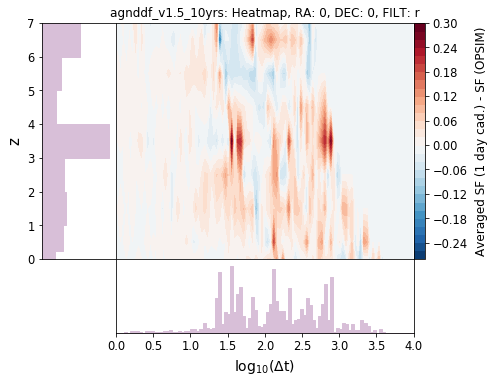


2) Densities of summed SF-metric across redshifts


<Figure size 432x288 with 0 Axes>

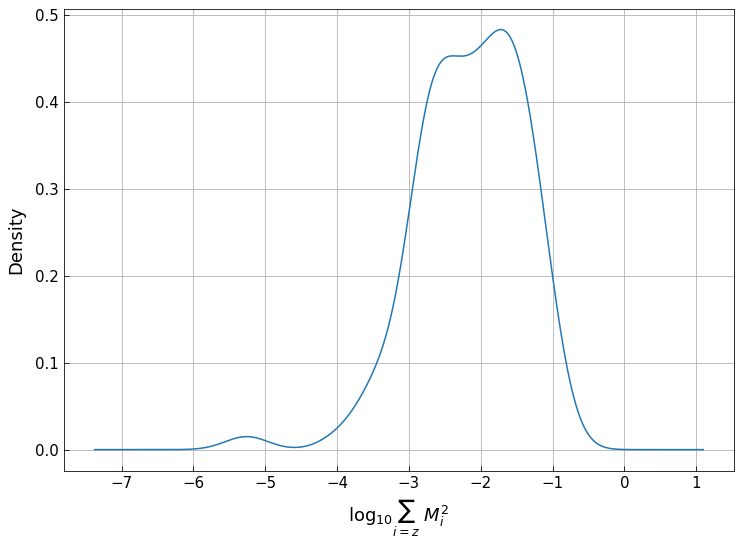

<Figure size 432x288 with 0 Axes>

In [2]:
# runAll function is used in order to obtain the results
test.setLabel('agnddf_v1.5_10yrs')
test.runAll()

#### Changing the default parameters 

<code>
setNoise(noise) - set Noise as float number. Default value is 0.00005
setFrame(frame) - set frame as string: 'observed' or 'rest'. Default value is 'observed'
setAmplitude(amp) - set amplitude as float numbe for light curve. Default value is 0.14
setLabel(name) - set label that will be used in images
setNlc(nlc) - set number of artificial light curves that are going to be generated. Default value is 3
</code>    


In [3]:
# Use setters in order to change default parameters
test.setNlc(10)

In [ ]:
test.runAll()

Querying database SummaryAllProps with constraint filter = 'r' for columns ['filter', 'fieldRA', 'fiveSigmaDepth', 'fieldDec', 'observationStartMJD']
Found 469008 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


### Replotting
Pre-condition: Metric has to be calculated first!

In [ ]:
test.plot_heatmap(label='My Heatmap', save=False)

In [ ]:
test.setNlc(5)
test.plot_heatmap()

In [ ]:
#Alternative way to run metrics
test.getMetrics()
test.plot_heatmap()

In [ ]:
#Raw metric data
print(test.getMetricData())